In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import DBSCAN 

In [2]:
data = pd.read_csv('test_Datda.csv')

In [3]:
data

,vin,yearr,mmm,ddd,hr,half_hour,avg_lat,avg_long,avg_bat_charge
0,MD9EMCDL24F217385,2025,1,1,4,h2,27.312450,77.774628,84.000000
1,MD9EMCDL24F217385,2025,1,1,16,h1,27.237260,77.873297,38.200000
2,MD9EMCDL24G217002,2025,1,1,12,h1,12.887503,80.188916,93.909091
3,MD9EMCDL24G217002,2025,1,1,8,h2,12.887571,80.189537,95.000000
4,MD9EMCDL24G217002,2025,1,1,2,h1,12.905336,80.192095,97.571429
...,...,...,...,...,...,...,...,...,...
154111,MD9EMHDL24H217108,2025,1,4,18,h1,28.654039,77.041359,98.860001
154112,MD9EMHDL24H217213,2025,1,4,12,h1,28.608850,77.360039,69.320000
154113,MD9EMHDL24J217110,2025,1,4,18,h1,28.479237,77.191742,12.000000
154114,MD9EMHDL24J217179,2025,1,4,5,h1,28.614929,77.317177,100.000000


In [4]:
df = data.dropna()

In [5]:
df

,vin,yearr,mmm,ddd,hr,half_hour,avg_lat,avg_long,avg_bat_charge
0,MD9EMCDL24F217385,2025,1,1,4,h2,27.312450,77.774628,84.000000
1,MD9EMCDL24F217385,2025,1,1,16,h1,27.237260,77.873297,38.200000
2,MD9EMCDL24G217002,2025,1,1,12,h1,12.887503,80.188916,93.909091
3,MD9EMCDL24G217002,2025,1,1,8,h2,12.887571,80.189537,95.000000
4,MD9EMCDL24G217002,2025,1,1,2,h1,12.905336,80.192095,97.571429
...,...,...,...,...,...,...,...,...,...
154111,MD9EMHDL24H217108,2025,1,4,18,h1,28.654039,77.041359,98.860001
154112,MD9EMHDL24H217213,2025,1,4,12,h1,28.608850,77.360039,69.320000
154113,MD9EMHDL24J217110,2025,1,4,18,h1,28.479237,77.191742,12.000000
154114,MD9EMHDL24J217179,2025,1,4,5,h1,28.614929,77.317177,100.000000


In [6]:
unique_values = df['vin'].unique()
print(len(unique_values))

1237


In [7]:
count = df['vin'].value_counts()
# print(count)

In [8]:
count

vin
MD9EMHDL23J217050    192
MD9EMHDL23E217054    192
MD9EMHDL22K217038    192
MD9EMHDL22K217019    192
MD9EMHDL23L217165    192
                    ... 
MD9EMHDL24B217316      4
MD9EMHDL24E217298      4
MD9EMHDL24D217067      4
MD9EMHDL23K217223      4
MD9EMHDL23B217238      4
Name: count, Length: 1237, dtype: int64

In [9]:
# Create a copy of the columns with correct names
date_cols = {
    'yearr': 'year',
    'mmm': 'month',
    'ddd': 'day',
    'hr': 'hour'
}
df_date = df[['yearr', 'mmm', 'ddd', 'hr']].rename(columns=date_cols)

# Create timestamp column
df['timestamp'] = pd.to_datetime(df_date)

C:\Users\vedpr\AppData\Local\Temp\ipykernel_31996\3722646221.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df_date)


In [11]:
df_date

,year,month,day,hour
0,2025,1,1,4
1,2025,1,1,16
2,2025,1,1,12
3,2025,1,1,8
4,2025,1,1,2
...,...,...,...,...
154111,2025,1,4,18
154112,2025,1,4,12
154113,2025,1,4,18
154114,2025,1,4,5


In [12]:
df.head()

,vin,yearr,mmm,ddd,hr,half_hour,avg_lat,avg_long,avg_bat_charge,timestamp
0,MD9EMCDL24F217385,2025,1,1,4,h2,27.312450,77.774628,84.000000,2025-01-01 04:00:00
1,MD9EMCDL24F217385,2025,1,1,16,h1,27.237260,77.873297,38.200000,2025-01-01 16:00:00
2,MD9EMCDL24G217002,2025,1,1,12,h1,12.887503,80.188916,93.909091,2025-01-01 12:00:00
3,MD9EMCDL24G217002,2025,1,1,8,h2,12.887571,80.189537,95.000000,2025-01-01 08:00:00
4,MD9EMCDL24G217002,2025,1,1,2,h1,12.905336,80.192095,97.571429,2025-01-01 02:00:00


In [13]:
print(df['timestamp'].head())

0   2025-01-01 04:00:00
1   2025-01-01 16:00:00
2   2025-01-01 12:00:00
3   2025-01-01 08:00:00
4   2025-01-01 02:00:00
Name: timestamp, dtype: datetime64[ns]


In [14]:
df['hour'] = df['timestamp'].dt.hour
night_df = df[(df['hour'] >= 0) & (df['hour'] < 5)]


C:\Users\vedpr\AppData\Local\Temp\ipykernel_31996\2292920831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['timestamp'].dt.hour


In [15]:
print(night_df['vin'].value_counts())

vin
MD9EMHDL23J217186    40
MD9EMHDL23K217221    40
MD9EMHDL24G217210    40
MD9EMHDL23L217052    40
MD9EMHDL23D217353    40
                     ..
MD9EMHDL24C217299     1
MD9EMHDL24D217294     1
MD9EMHDL23C217071     1
MD9EMHDL24C217025     1
MD9EMHDL23K217226     1
Name: count, Length: 1088, dtype: int64


In [38]:
gg = night_df.groupby(['vin','avg_lat','avg_long'])

In [66]:
gg.size().reset_index(name = 'count')

,vin,avg_lat,avg_long,count
0,MD9EMCDL24F217385,27.234344,77.872581,1
1,MD9EMCDL24F217385,27.234428,77.872580,1
2,MD9EMCDL24F217385,27.235042,77.873094,1
3,MD9EMCDL24F217385,27.235339,77.872875,1
4,MD9EMCDL24F217385,27.235497,77.872938,1
...,...,...,...,...
26452,MD9EMHDL24K217299,28.613568,77.071821,1
26453,MD9EMHDL24K217299,28.619116,77.086158,1
26454,MD9EMHDL24K217299,28.627903,77.109814,1
26455,MD9EMHDL24K217299,28.628639,77.120937,1


In [67]:
type(gg)

pandas.core.groupby.generic.DataFrameGroupBy

In [68]:
location_counts = (
    night_df.groupby(['vin', 'avg_lat', 'avg_long'])
    .size()
    .reset_index(name='count')
)

residence_location = (
    location_counts.sort_values('count', ascending=False)
    .drop_duplicates(subset='vin')
)


In [69]:
residence_location = (
    location_counts.sort_values('count', ascending=False)
    .drop_duplicates(subset='vin')
)

In [70]:
type(residence_location)

pandas.core.frame.DataFrame

In [71]:
residence_location

,vin,avg_lat,avg_long,count
10246,MD9EMHDL23M217215,1.677722,0.003803,34
3398,MD9EMHDL23D217399,1.677722,0.023950,30
1859,MD9EMHDL23C217065,12.955960,77.577130,26
4271,MD9EMHDL23G217026,17.337898,78.563350,22
20009,MD9EMHDL24E217291,28.708590,77.258362,20
...,...,...,...,...
8848,MD9EMHDL23L217208,17.423313,78.353987,1
9530,MD9EMHDL23M217119,28.713389,77.097397,1
9511,MD9EMHDL23M217115,28.775554,77.077821,1
9212,MD9EMHDL23M217078,13.120100,77.628941,1


In [133]:
residence_location.to_excel('solution.xlsx', sheet_name='Q1_Residence_Location')


In [82]:
vehi = 'MD9EMHDL23M217215'
vehicle_df = night_df[night_df['vin'] == vehi]

In [85]:
vehicle_df

,vin,yearr,mmm,ddd,hr,half_hour,avg_lat,avg_long,avg_bat_charge,timestamp,hour
6236,MD9EMHDL23M217215,2025,1,1,4,h2,1.677722,0.003803,76.309585,2025-01-01 04:00:00,4
9288,MD9EMHDL23M217215,2025,1,1,4,h1,1.677722,0.003803,86.784000,2025-01-01 04:00:00,4
26458,MD9EMHDL23M217215,2025,1,1,0,h1,1.677722,0.003803,97.040001,2025-01-01 00:00:00,0
26459,MD9EMHDL23M217215,2025,1,1,3,h2,1.677722,0.003803,89.524653,2025-01-01 03:00:00,3
26462,MD9EMHDL23M217215,2025,1,1,1,h1,1.677722,0.003803,97.040001,2025-01-01 01:00:00,1
26470,MD9EMHDL23M217215,2025,1,1,2,h2,1.677722,0.003803,97.040001,2025-01-01 02:00:00,2
26473,MD9EMHDL23M217215,2025,1,1,2,h1,1.677722,0.003803,97.040001,2025-01-01 02:00:00,2
26835,MD9EMHDL23M217215,2025,1,1,3,h1,1.677722,0.003803,96.850001,2025-01-01 03:00:00,3
43449,MD9EMHDL23M217215,2025,1,2,1,h1,1.677722,0.003803,100.000000,2025-01-02 01:00:00,1
43451,MD9EMHDL23M217215,2025,1,2,2,h2,1.677722,0.003803,100.000000,2025-01-02 02:00:00,2


In [86]:
vin = 'MD9EMHDL23J217186'
vehicle_df = night_df[night_df['vin'] == vin]

In [87]:
from sklearn.cluster import DBSCAN

In [96]:
coords = vehicle_df[['avg_lat', 'avg_long']].to_numpy()

# DBSCAN: eps in degrees (~0.0005 ~ 50 meters), adjust as needed
clustering = DBSCAN(eps=0.00005, min_samples=2).fit(coords)

vehicle_df['cluster'] = clustering.labels_


C:\Users\vedpr\AppData\Local\Temp\ipykernel_31996\2253177715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_df['cluster'] = clustering.labels_


In [97]:
vehicle_df.head()

,vin,yearr,mmm,ddd,hr,half_hour,avg_lat,avg_long,avg_bat_charge,timestamp,hour,cluster
4112,MD9EMHDL23J217186,2025,1,1,2,h1,28.479519,77.295746,100.0,2025-01-01 02:00:00,2,0
4115,MD9EMHDL23J217186,2025,1,1,0,h1,28.479464,77.295774,100.0,2025-01-01 00:00:00,0,0
6519,MD9EMHDL23J217186,2025,1,1,4,h1,28.479432,77.295695,100.0,2025-01-01 04:00:00,4,0
6526,MD9EMHDL23J217186,2025,1,1,0,h2,28.479329,77.295705,100.0,2025-01-01 00:00:00,0,0
6527,MD9EMHDL23J217186,2025,1,1,1,h1,28.479210,77.295720,100.0,2025-01-01 01:00:00,1,-1


In [98]:
vehicle_df['cluster'].unique()

array([ 0, -1,  1], dtype=int64)

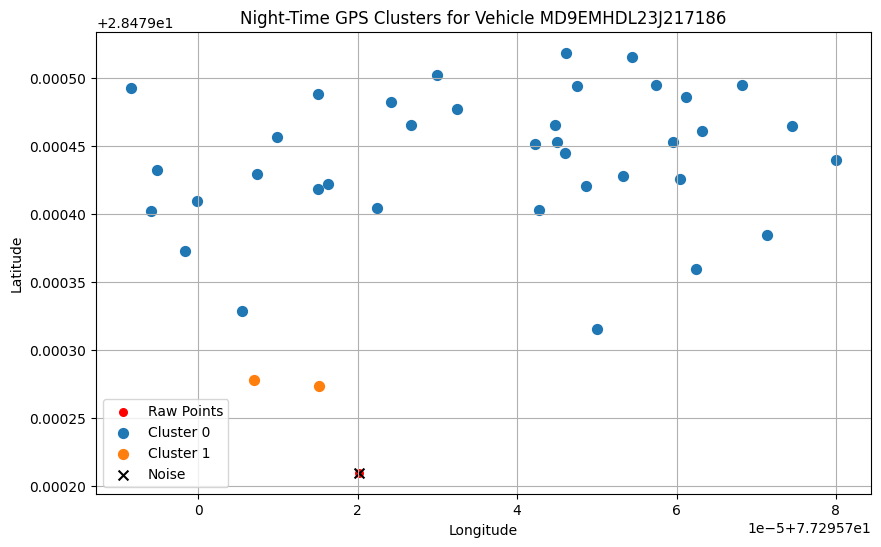

In [99]:
plt.figure(figsize=(10, 6))

# Plot raw points
plt.scatter(vehicle_df['avg_long'], vehicle_df['avg_lat'], c='red', s=30, label='Raw Points')

# Plot clusters with colors
for label in set(clustering.labels_):
    cluster_data = vehicle_df[vehicle_df['cluster'] == label]
    if label == -1:
        # Noise
        plt.scatter(cluster_data['avg_long'], cluster_data['avg_lat'], c='black', label='Noise', s=50, marker='x')
    else:
        plt.scatter(cluster_data['avg_long'], cluster_data['avg_lat'], label=f'Cluster {label}', s=50)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Night-Time GPS Clusters for Vehicle {vin}")
plt.legend()
plt.grid(True)
plt.show()


In [163]:
night_df[night_df['avg_lat']>90]

,vin,yearr,mmm,ddd,hr,half_hour,avg_lat,avg_long,avg_bat_charge,timestamp,hour
31,MD9EMCDL24G217011,2025,1,1,2,h2,197567.781400,75.857829,82.260870,2025-01-01 02:00:00,2
34243,MD9EMHDL24D217173,2025,1,1,4,h2,124822.020300,76.981448,99.000000,2025-01-01 04:00:00,4
36345,MD9EMHDL24J217227,2025,1,1,3,h2,52712.645160,77.325057,100.000000,2025-01-01 03:00:00,3
140298,MD9EMHDL24F217029,2025,1,4,4,h2,96.702036,3.485430,97.008561,2025-01-04 04:00:00,4
